In [1]:
import matplotlib.pyplot as plt
import os
import cv2 as cv
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import random
import tensorflow as tf
from resnet50_model import create_fire_detection_model, preprocess_data

In [2]:
def generate_fire_temperature():
    # gera uma temperatura aleatória de 60 a 100 graus
    return round(random.uniform(60, 100), 1)

def generate_normal_temperature():
    # gera uma temperatura aleatoria de 20 a 35 graus
    return round(random.uniform(20, 35), 1)

def load_image(image_path):
    try:
        # le a imagem com o opencv
        img = cv.imread(image_path)
        if img is not None:
            # bgr para rgb
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            return img
        return None
    except Exception as e:
        print(f"Error loading image {image_path}: {str(e)}")
        return None

def carregar_imagens_fire(pasta_base):
    dataset = []
    
    if os.path.exists(pasta_base):
        # Processar pasta de imagens com fogo
        fire_path = os.path.join(pasta_base, "fire_images")
        if os.path.exists(fire_path):
            for ficheiro in os.listdir(fire_path):
                if ficheiro.lower().endswith(('.png', '.jpg', '.jpeg')):
                    caminho = os.path.join(fire_path, ficheiro)
                    imagem = load_image(caminho)
                    if imagem is not None:
                        temp = generate_fire_temperature()
                        dataset.append([imagem, 1, temp])  # [image, label=1 for fire, temperature]
                    else:
                        print(f"Skipping corrupted or unreadable image: {caminho}")
    
    return dataset

def carregar_imagens_non_fire(pasta_base):
    dataset = []
    
    if os.path.exists(pasta_base):
        # Processar pasta de imagens sem fogo
        non_fire_path = os.path.join(pasta_base, "non_fire_images")
        if os.path.exists(non_fire_path):
            for ficheiro in os.listdir(non_fire_path):
                if ficheiro.lower().endswith(('.png', '.jpg', '.jpeg')):
                    caminho = os.path.join(non_fire_path, ficheiro)
                    imagem = load_image(caminho)
                    if imagem is not None:
                        temp = generate_normal_temperature()
                        dataset.append([imagem, 0, temp])  # [image, label=0 for non-fire, temperature]
                    else:
                        print(f"Skipping corrupted or unreadable image: {caminho}")
    
    return dataset

In [3]:
dataset_pos_1= carregar_imagens_fire('imagens/fire_dataset 1')
dataset_neg_1= carregar_imagens_non_fire('imagens/fire_dataset 1')

Skipping corrupted or unreadable image: imagens/fire_dataset 1\non_fire_images\non_fire.189.png


In [4]:
dataset_pos_2 = carregar_imagens_fire('imagens/fire_dataset 2')
dataset_neg_2 = carregar_imagens_non_fire('imagens/fire_dataset 2')

In [5]:
dataset_pos_3 = carregar_imagens_fire('imagens/fire_dataset 3')
dataset_neg_3 = carregar_imagens_non_fire('imagens/fire_dataset 3')

Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_1574.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_2247.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_585.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_586.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_587.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_589.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_59.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_590.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_591.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_592.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_593.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\f

In [6]:
dataset_pos= carregar_imagens_fire('imagens/fire_dataset 1')
dataset_pos += carregar_imagens_fire('imagens/fire_dataset 2')
dataset_pos += carregar_imagens_fire('imagens/fire_dataset 3')
dataset_neg= carregar_imagens_non_fire('imagens/fire_dataset 1')
dataset_neg += carregar_imagens_non_fire('imagens/fire_dataset 2')
dataset_neg += carregar_imagens_non_fire('imagens/fire_dataset 3')

Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_1574.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_2247.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_585.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_586.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_587.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_589.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_59.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_590.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_591.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_592.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\fire_images\F_593.jpg
Skipping corrupted or unreadable image: imagens/fire_dataset 3\f


Fire Images Examples:


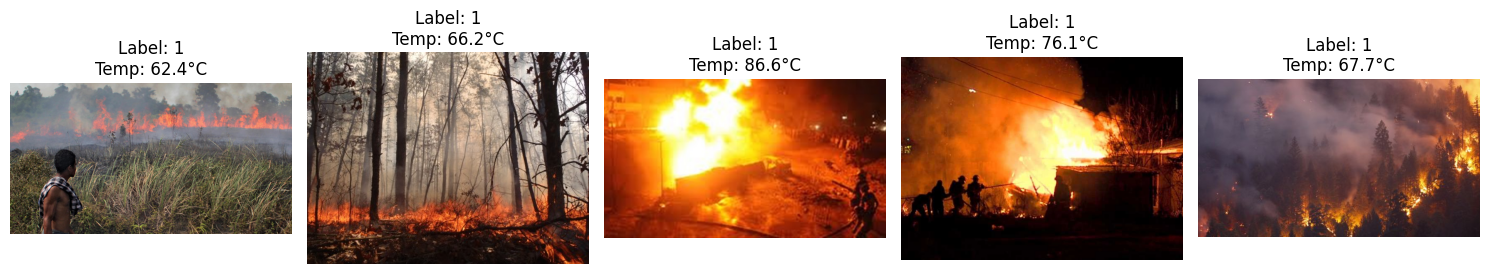


Example temperatures for fire images:
Image 1: 62.4°C
Image 2: 66.2°C
Image 3: 86.6°C
Image 4: 76.1°C
Image 5: 67.7°C

Non-Fire Images Examples:


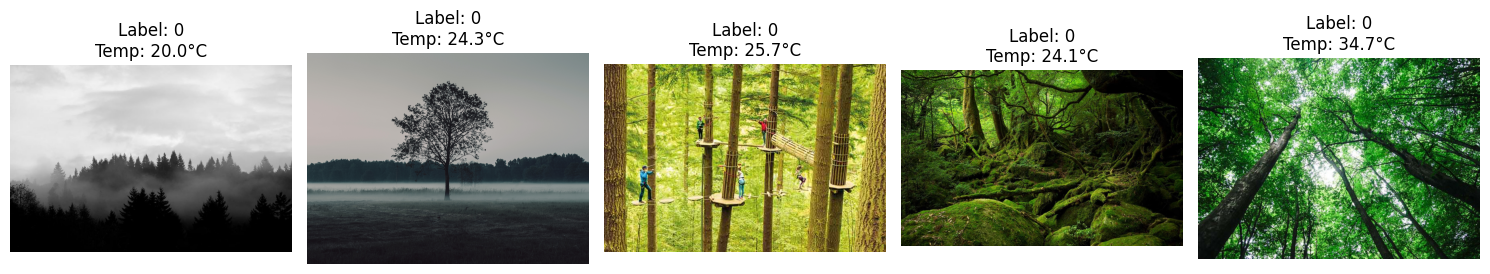


Example temperatures for non-fire images:
Image 1: 20.0°C
Image 2: 24.3°C
Image 3: 25.7°C
Image 4: 24.1°C
Image 5: 34.7°C


In [7]:
# Função de visualização de imagens com etiquetas e temperaturas
def display_images(images_with_labels, num_images=5):
    n = min(num_images, len(images_with_labels))
    plt.figure(figsize=(15, 3))
    
    for i in range(n):
        plt.subplot(1, n, i+1)
        image = images_with_labels[i][0]  # Get PIL image
        label = images_with_labels[i][1]  # Get label
        temp = images_with_labels[i][2]   # Get temperature
        plt.imshow(image)
        plt.title(f'Label: {label}\nTemp: {temp}°C')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar imagens de exemplo de ambos os conjuntos de dados
if len(dataset_pos) > 0:
    print("\nFire Images Examples:")
    display_images(dataset_pos)
    print("\nExample temperatures for fire images:")
    for i in range(min(5, len(dataset_pos))):
        print(f"Image {i+1}: {dataset_pos[i][2]}°C")

if len(dataset_neg) > 0:
    print("\nNon-Fire Images Examples:")
    display_images(dataset_neg)
    print("\nExample temperatures for non-fire images:")
    for i in range(min(5, len(dataset_neg))):
        print(f"Image {i+1}: {dataset_neg[i][2]}°C")

In [8]:
# passar para dataframe
import pandas as pd
df_pos = pd.DataFrame(dataset_pos, columns=['image', 'label', 'temperature'])
#df_pos.to_csv('fire_dataset.csv', index=False)
df_neg = pd.DataFrame(dataset_neg, columns=['image', 'label', 'temperature'])
#df_neg.to_csv('non_fire_dataset.csv', index=False)

In [9]:
df_pos.head()

,image,label,temperature
0,"[[[205, 209, 208], [204, 208, 207], [203, 207,...",1,62.4
1,"[[[119, 117, 120], [112, 110, 111], [120, 118,...",1,66.2
2,"[[[222, 80, 8], [207, 63, 0], [191, 46, 2], [1...",1,86.6
3,"[[[57, 26, 24], [57, 26, 24], [55, 25, 23], [5...",1,76.1
4,"[[[92, 79, 96], [93, 80, 97], [94, 81, 98], [9...",1,67.7


In [10]:
df_neg.head()

,image,label,temperature
0,"[[[196, 196, 196], [196, 196, 196], [196, 196,...",0,20.0
1,"[[[169, 168, 166], [169, 168, 166], [171, 170,...",0,24.3
2,"[[[45, 21, 0], [37, 13, 0], [68, 44, 18], [124...",0,25.7
3,"[[[19, 32, 2], [34, 48, 15], [41, 57, 20], [46...",0,24.1
4,"[[[11, 28, 10], [7, 26, 6], [14, 36, 15], [17,...",0,34.7


In [11]:
train_df_pos, test_df_pos = train_test_split(df_pos, test_size=0.2, random_state=42, stratify=df_pos['label'])
train_df_neg, test_df_neg = train_test_split(df_neg, test_size=0.2, random_state=42, stratify=df_neg['label'])

In [12]:
df_train = pd.concat([train_df_pos, train_df_neg], axis=0, ignore_index=True)
df_test = pd.concat([test_df_pos, test_df_neg], axis=0, ignore_index=True)

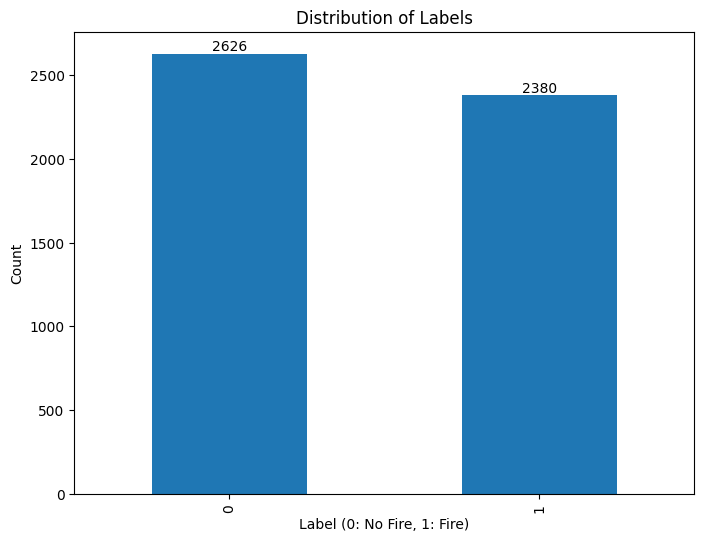

In [13]:
plt.figure(figsize=(8, 6))
df_train['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label (0: No Fire, 1: Fire)')
plt.ylabel('Count')
for i, v in enumerate(df_train['label'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [14]:
def prepare_data(df):
    images = []
    temperatures = []
    labels = []
    
    for _, row in df.iterrows():
 
        img = row['image']
        temp = row['temperature']
        label = row['label']
        
        # preprocessamento dos dados
        processed_img, processed_temp = preprocess_data(img, temp)
        
        images.append(processed_img)
        temperatures.append(processed_temp)
        labels.append(label)
    
    return np.array(images), np.array(temperatures), np.array(labels)

In [15]:
train_images, train_temps, train_labels = prepare_data(df_train)
test_images, test_temps, test_labels = prepare_data(df_test)

In [16]:
model = create_fire_detection_model()

In [17]:
# compilar o modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='models/model_epoch_{epoch:02d}.keras',
    save_best_only=False,
    save_weights_only=False,
    verbose=1
)

In [19]:
model_keras = tf.keras.models.load_model('models/model_epoch_04.keras')

In [20]:

history = model.fit(
    [train_images, train_temps],
    train_labels,
    batch_size=32,
    epochs=15,
    validation_data=([test_images, test_temps], test_labels),
    callbacks=[checkpoint_callback]
)

Epoch 1/15


c:\Users\vehnie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'temperature_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7773 - loss: 0.4585
Epoch 1: saving model to models/model_epoch_01.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1292s 8s/step - accuracy: 0.7777 - loss: 0.4579 - val_accuracy: 0.5248 - val_loss: 1.2031
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8948 - loss: 0.2592
Epoch 2: saving model to models/model_epoch_02.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1255s 8s/step - accuracy: 0.8948 - loss: 0.2591 - val_accuracy: 0.5775 - val_loss: 0.7929
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9224 - loss: 0.1954
Epoch 3: saving model to models/model_epoch_03.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1256s 8s/step - accuracy: 0.9224 - loss: 0.1955 - val_accuracy: 0.8962 - val_loss: 0.2665
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9353 - loss: 0.1634
Epoch 4: saving model to models/model_epoch_04.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1256s 8s/step - accuracy: 0.9353 - loss: 0.1634 - val_accuracy: 0.9409 - 

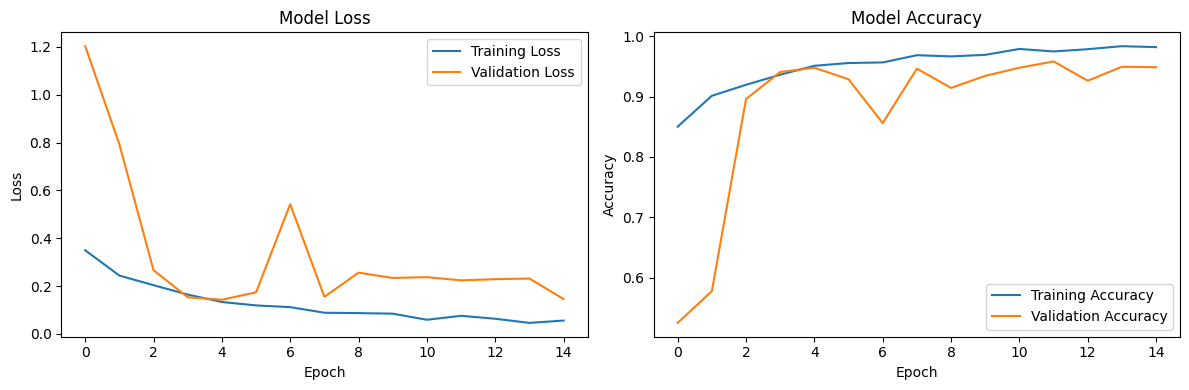

40/40 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9604 - loss: 0.1271

Test accuracy: 0.9489
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       657
           1       0.93      0.96      0.95       595

    accuracy                           0.95      1252
   macro avg       0.95      0.95      0.95      1252
weighted avg       0.95      0.95      0.95      1252



In [21]:
# Plot treino
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# avaliacao do modelo
test_loss, test_accuracy = model.evaluate([test_images, test_temps], test_labels)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# predicts
predictions = model.predict([test_images, test_temps])

# report
from sklearn.metrics import classification_report
predicted_classes = (predictions > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes))

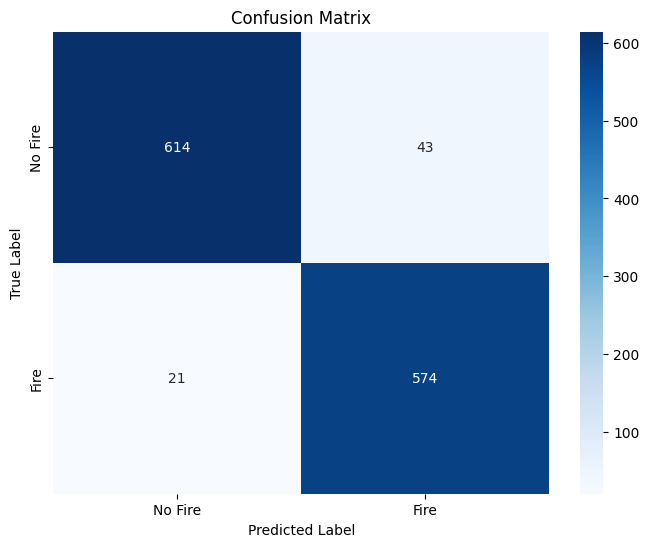


Confusion Matrix:
True Negatives: 614
False Positives: 43
False Negatives: 21
True Positives: 574


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)


plt.figure(figsize=(8, 6))


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


plt.xticks([0.5, 1.5], ['No Fire', 'Fire'])
plt.yticks([0.5, 1.5], ['No Fire', 'Fire'])

plt.show()


print("\nConfusion Matrix:")
print(f"True Negatives: {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives: {cm[1][1]}")